<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#stats stuff
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.columns = df.columns.map(lambda x: x.replace(' ','_'))

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Check for Multicollinearity

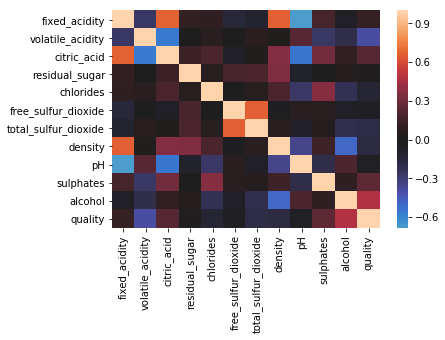

In [6]:
sns.heatmap(df.corr(),center=0);

In [7]:
(abs(df.corr()) > 0.75).sum()

fixed_acidity           1
volatile_acidity        1
citric_acid             1
residual_sugar          1
chlorides               1
free_sulfur_dioxide     1
total_sulfur_dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

These two above cells confirm no multicollinearity to worry about.

## Visualize for Non-Transformed Data

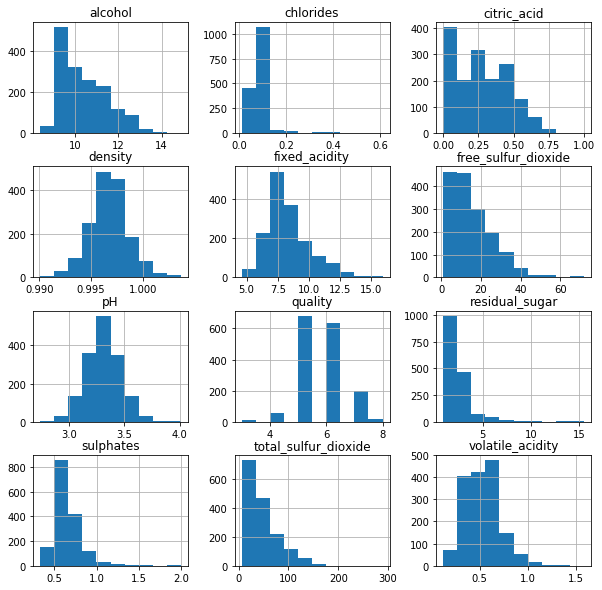

In [8]:
df.hist(figsize  = [10, 10]); 

The above visuals show that density and pH are already normally-distributed. Others will need to be log transformed. Several columns have values between 0 and 1, and thus will need to be transformed according to log(x+1).

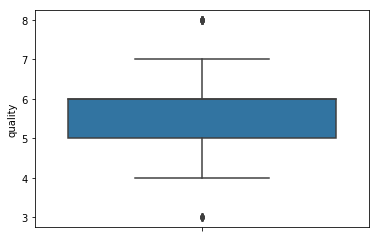

In [9]:
sns.boxplot(y=df.quality)

The quality column has mostly values at 5 or 6, which probably won't tell us much about any of the other variables. We therefore will omit this from our exploration.

## Log Transform

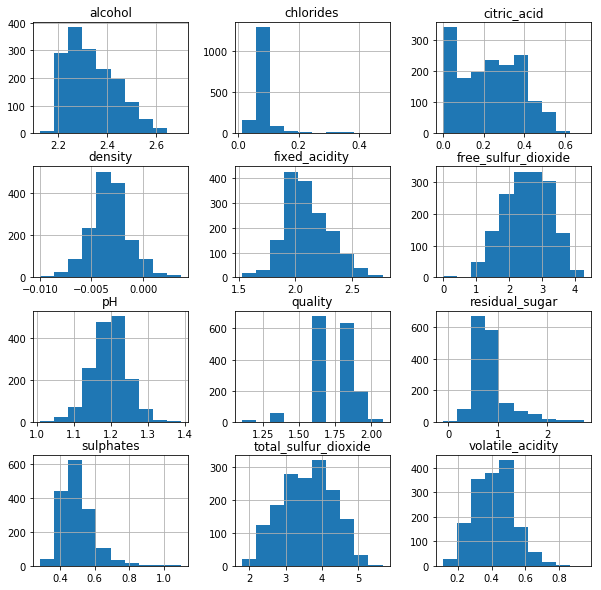

In [10]:
# Create log-transformed DF
df_log = pd.DataFrame([])

# Keep track of which categories to apply which transformations to (The slicing gets rid of the quality column)
cats = df.columns
non_log_cats = ['pH','density', 'quality']
offset_log_cats = ['citric_acid','free_sulphur_dioxide','chlorides','volatile_acidity', 'sulphates']

# Iterate
for cat in cats:
    
    # Don't transform already normally-distributed data
    if cat in non_log_cats:
        df_log[cat] = df[cat]
        
    # Add 1 and THEN log transform columns containing values between [0,1)
    if cat in offset_log_cats:
        df_log[cat] = np.log(df[cat] + 1)
    
    # Log transform everything else
    else:
        df_log[cat] = np.log(df[cat])


df_log.hist(figsize  = [10, 10]);

## Feature Scaling

We are going to min-max scale to get our data between 0 and 1 for multiple linear regression.

In [11]:
y = df[["alcohol"]]
X = df_log #.drop(labels='alcohol',axis=1)

scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

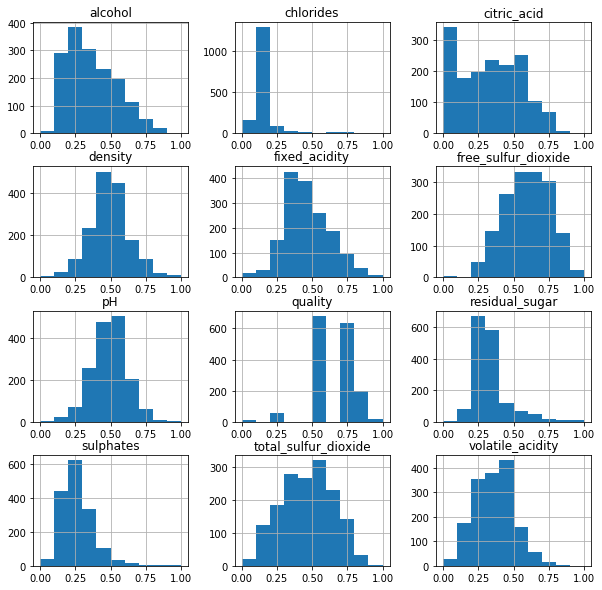

In [12]:
X.hist(figsize  = [10, 10]);

# Statistical Modeling

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
data_ols = X
data_ols.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.383325,0.500083,0.000000,0.262530,0.131896,0.560693,0.447677,0.569223,0.650306,0.196091,0.196252,0.520810
1,0.425771,0.620692,0.000000,0.372733,0.175429,0.752660,0.622746,0.495834,0.407509,0.287196,0.268963,0.520810
2,0.425771,0.541649,0.056584,0.329657,0.163644,0.633215,0.567074,0.510518,0.456287,0.265045,0.268963,0.520810
3,0.717475,0.160021,0.641546,0.262530,0.129896,0.662482,0.594267,0.583892,0.374479,0.211752,0.268963,0.706695
4,0.383325,0.500083,0.000000,0.262530,0.131896,0.560693,0.447677,0.569223,0.650306,0.196091,0.196252,0.520810


In [15]:
# Create the formula of form "outcome ~ predictor_1+predictor_2+...+predictor_n"
data_ols = X
outcome = 'alcohol'
predictors = data_ols.drop('alcohol', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     338.6
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:53:16   Log-Likelihood:                 1506.8
No. Observations:                1599   AIC:                            -2990.
Df Residuals:                    1587   BIC:                            -2925.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1416      0.031     -4.637      0.000      -0.202      -0.082
fixed_acidity            0.8501      0.036     23.661      0.000       0.780       0.921
volatile_acidity         0.1235      0.024      5.165      0.000       0.077       0.170
citric_acid              0.1146      0.019      6.132      0.000       0.078       0.151
residual_sugar           0.5704      0.022     26.020      0.000       0.527       0.613
chlorides               -0.1053      0.034     -3.111      0.002      -0.172      -0.039
free_sulfur_dioxide     -0.0056      0.025     -0.223      0.823      -0.055       0.044
total_sulfur_dioxide    -0.0781      0.023     -3.360      0.001      -0.124      -0.033
density                 -1.3205      0.031    -42.199      0.000      -1.382      -1.259
pH                       0.7358      0.031     23.488      0.000       0.674       0.797
sulphates                0.2731      0.024     11.192      0.000       0.225       0.321
quality                  0.1773      0.019      9.251      0.000       0.140       0.215
==============================================================================
Omnibus:                      141.656   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.028
Skew:                           0.634   Prob(JB):                     9.21e-52
Kurtosis:                       4.386   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that $p_\text{free sulfur dioxide} > \alpha$ so we will eliminate this predictor from the model. Also, free sulfur dioxide is accounted for in total sulfur dioxide, so we don't really lose much by eliminating this predictor.

In [16]:
X.drop('free_sulfur_dioxide',axis=1,inplace=True)

multicollinearity

In [17]:
X.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.383325,0.500083,0.0,0.26253,0.131896,0.447677,0.569223,0.650306,0.196091,0.196252,0.52081


In [18]:
sample = ['fixed_acidity', 'pH', 'density', 'alcohol', 'quality']

In [19]:
data_pred = X.loc[:,sample]

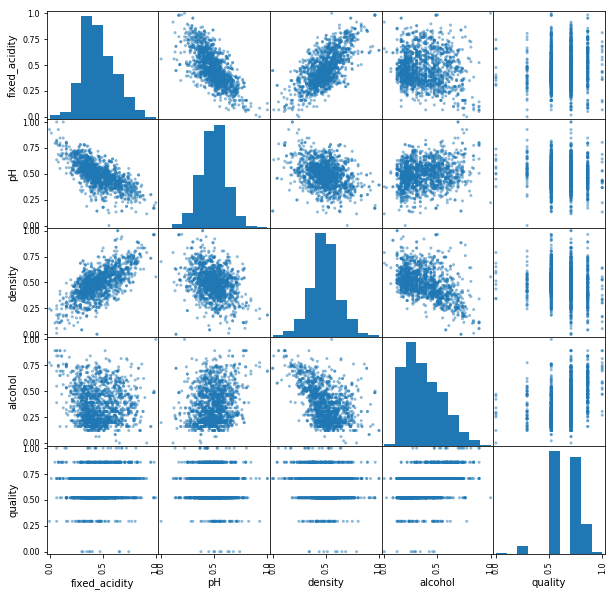

In [20]:
pd.plotting.scatter_matrix(data_pred,figsize  = [10,10]);
plt.show()

Interesting collinearity between pH and density.

Is density and alcohol content a problem?


## Take 2

In [21]:
# Create the formula of form "outcome ~ predictor_1+predictor_2+...+predictor_n"
data_ols = X
outcome = 'alcohol'
predictors = data_ols.drop('alcohol', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     372.6
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:53:19   Log-Likelihood:                 1506.8
No. Observations:                1599   AIC:                            -2992.
Df Residuals:                    1588   BIC:                            -2932.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1427      0.030     -4.729      0.000      -0.202      -0.084
fixed_acidity            0.8491      0.036     23.859      0.000       0.779       0.919
volatile_acidity         0.1241      0.024      5.232      0.000       0.078       0.171
citric_acid              0.1153      0.018      6.258      0.000       0.079       0.151
residual_sugar           0.5701      0.022     26.068      0.000       0.527       0.613
chlorides               -0.1056      0.034     -3.124      0.002      -0.172      -0.039
total_sulfur_dioxide    -0.0822      0.014     -5.815      0.000      -0.110      -0.054
density                 -1.3194      0.031    -42.708      0.000      -1.380      -1.259
pH                       0.7348      0.031     23.715      0.000       0.674       0.796
sulphates                0.2730      0.024     11.194      0.000       0.225       0.321
quality                  0.1771      0.019      9.257      0.000       0.140       0.215
==============================================================================
Omnibus:                      142.093   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.039
Skew:                           0.635   Prob(JB):                     5.56e-52
Kurtosis:                       4.390   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept p value is still $> \alpha$ but we will proceed for now.

In [22]:
def compare_fits(X,y,test_size=0.2, alpha=0.5):
    """
    Print out fit comparisons between linear, ridge, and lasso regressions.
    
    Param X: predictors
    Param y: outcome
    Param test_size: percentage of data set to be used as the test sample
    Param alpha: hyperparameter for ridge and lasso. Must be [0,1].
    """
    # Perform test train split
    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Build a Ridge, Lasso and regular linear regression model. 
    # Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    lin = LinearRegression()
    lin.fit(X_train, y_train)
    
#     print("Unpenalized Linear Regression Coefficients are:{}".format(dict(zip(X.columns,lin.coef_[0]))))
#     print("\nUnpenalized Linear Regression Intercept:{}".format(lin.intercept_))
#     print('\n')
#     print("\nLasso Regression Coefficients are:{}".format(dict(zip(X.columns,lasso.coef_))))
#     print("\nLasso Linear Regression Intercept:{}".format(lasso.intercept_))
#     print('\n')
#     print("\nRidge Regression Coefficients are:{}".format(dict(zip(X.columns,ridge.coef_[0]))))
#     print("\nRidge Linear Regression Intercept:{}".format(ridge.intercept_))
#     print('\n')
    # create predictions
    y_h_ridge_train = ridge.predict(X_train)
    y_h_ridge_test = ridge.predict(X_test)

    y_h_lasso_train = np.reshape(lasso.predict(X_train),(1279,1))
    y_h_lasso_test = np.reshape(lasso.predict(X_test),(320,1))

    y_h_lin_train = lin.predict(X_train)
    y_h_lin_test = lin.predict(X_test)
    
    # examine the residual sum of sq
#     print('---------------------------------------')
#     print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
#     print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
#     print('\n')

#     print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
#     print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
#     print('\n')

#     print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
#     print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))
    
    train_error_ridge = np.sum((y_train - y_h_ridge_train)**2)
    test_error_ridge = np.sum((y_test - y_h_ridge_test)**2)
    
    train_error_linear = np.sum((y_train - lin.predict(X_train))**2)
    test_error_linear = np.sum((y_test - lin.predict(X_test))**2)
    
    return [train_error_ridge[0], test_error_ridge[0], train_error_linear[0], test_error_linear[0]]

In [23]:
[0.1] + compare_fits(X,y,test_size=0.2)

[0.1,
 5.262340027904187,
 0.9679840359313826,
 4.690763645993469,
 0.900957148486292]

In [24]:
data = [[round(x,1)] + compare_fits(X,y,test_size=0.2, alpha=x) for x in np.arange(0.1, 1, 0.1)]

fits_df = pd.DataFrame(data,columns = ['alpha','train_error_ridge','test_error_ridge','train_error_linear','test_error_linear'])

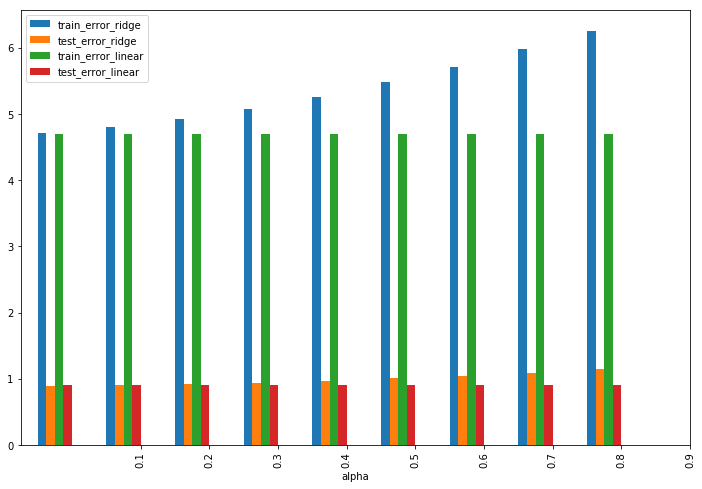

In [25]:
fits_df.plot(x='alpha',kind='bar',position=3,figsize=(12,8))

The nonpenalized model is superior to the penalized linear models.

#### Determine Interactions:

In [ ]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(horse_1, yr_old['mpg'],  color='blue', alpha = 0.3, label = 'older cars')
plt.scatter(horse_2, yr_young['mpg'],  color='red', alpha = 0.3, label = 'younger cars')

plt.plot(horse_1, pred_1,  color='blue', linewidth=2)
plt.plot(horse_2, pred_2,  color='red', linewidth=2)

In [27]:
X.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.383325,0.500083,0.0,0.26253,0.131896,0.447677,0.569223,0.650306,0.196091,0.196252,0.52081


In [34]:
low_acid = X[X['pH']<.5]
high_acid = X[X['pH']>=.5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,0.425771,0.620692,0.0,0.372733,0.175429,0.622746,0.495834,0.407509,0.287196,0.268963,0.52081


In [56]:
def check_interaction(df_high,df_low,iv,dv,grouped_var):
    """
    Plots a scatter plot of the dependent variable [dv] as a function of the independent variable [iv]
    when iv is split into two groups, as denoted by df_high and df_low. These two dataframes must contain mutually
    exclusive data.
    Param df_high: [pandas DataFrame] First split (high values)
    Param df_low: [pandas DataFrame] First split (low values)
    Param iv: [str] the name of the independent variable exactly as it appears in the dataframes.
    Param dv: [str] the name of the dependent variable exactly as it appears in the dataframes.
    Param grouped_var: [str] the name of the variable that was used to split the iv into two dataframes. Must
                       be written exactly as it appears in the dataframe.
    """
    plt.figure(figsize=(12,7));
    
    regression_1 = LinearRegression()
    regression_2 = LinearRegression()
    
    high_data = df_high[iv].values.reshape(-1, 1)
    low_data = df_low[iv].values.reshape(-1, 1)
    
    regression_1.fit(high_data, df_high[dv])
    regression_2.fit(low_data, df_low[dv])
    
    # Make predictions using the testing set
    pred_1 = regression_1.predict(high_data)
    pred_2 = regression_2.predict(low_data)
    
    # The coefficients
    print('regression coeff 1 is ', regression_1.coef_)
    print('regression coeff 2 is ', regression_2.coef_)
    
    # Plot outputs
    plt.figure(figsize=(10,6));
    
    plt.scatter(high_data, df_high[dv],  color='blue', alpha = 0.3, label = f'high {grouped_var}');
    plt.scatter(low_data, df_low[dv],  color='red', alpha = 0.3, label = f'low {grouped_var}');
    
    plt.plot(high_data, pred_1,  color='blue', linewidth=2);
    plt.plot(low_data, pred_2,  color='red', linewidth=2);
    
    plt.ylabel(dv)
    plt.xlabel(iv)
    plt.title(f'Interaction between {iv} and {grouped_var}')
    plt.legend();

regression coeff 1 is  [0.4454119]
regression coeff 2 is  [0.6323334]


<Figure size 864x504 with 0 Axes>

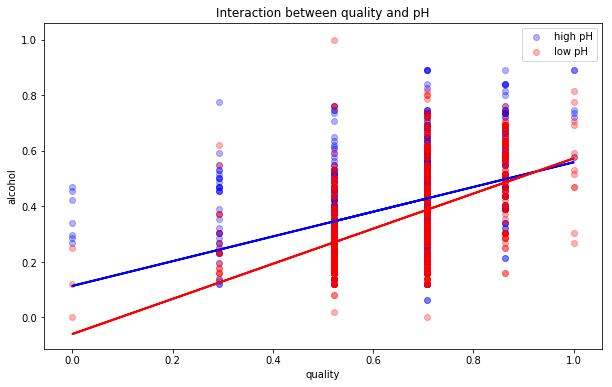

In [50]:
low_acid = X[X['pH']<.5]
high_acid = X[X['pH']>=.5]
check_interaction(high_acid, low_acid, 'quality', 'alcohol', 'pH')

Interaction

regression coeff 1 is  [-0.4064346]
regression coeff 2 is  [0.21700736]


<Figure size 864x504 with 0 Axes>

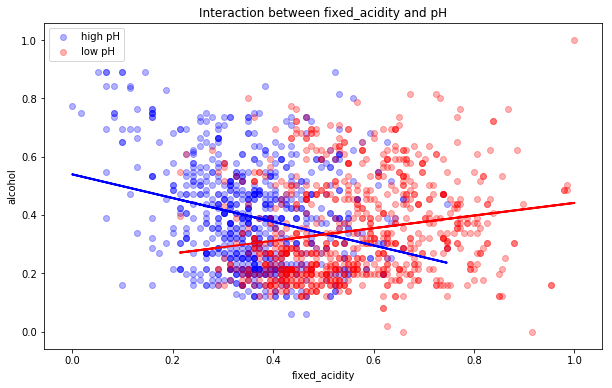

In [51]:
low_acid = X[X['pH']<.5]
high_acid = X[X['pH']>=.5]
check_interaction(high_acid, low_acid, 'fixed_acidity', 'alcohol', 'pH')

Interaction

regression coeff 1 is  [-0.13042334]
regression coeff 2 is  [-0.49630452]


<Figure size 864x504 with 0 Axes>

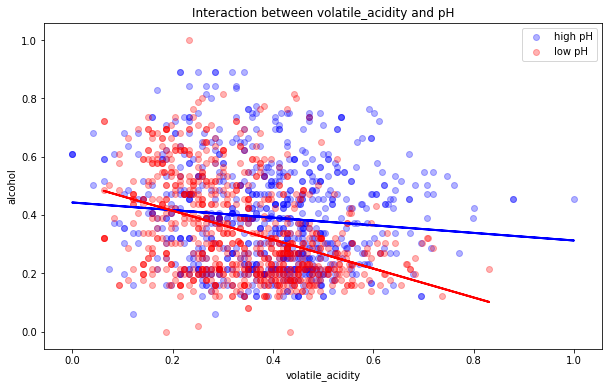

In [52]:
low_acid = X[X['pH']<.5]
high_acid = X[X['pH']>=.5]
check_interaction(high_acid, low_acid, 'volatile_acidity', 'alcohol', 'pH')

Interaction

regression coeff 1 is  [0.0400787]
regression coeff 2 is  [0.28774814]


<Figure size 864x504 with 0 Axes>

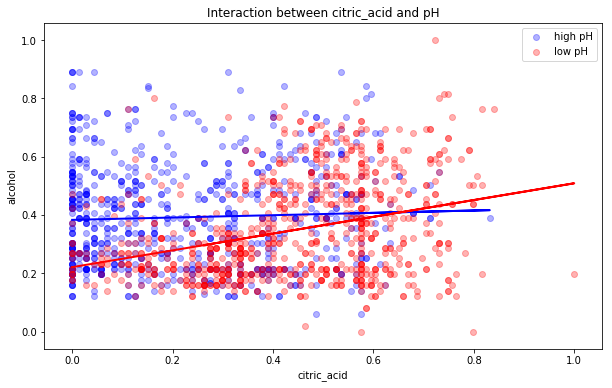

In [54]:
low_acid = X[X['pH']<.5]
high_acid = X[X['pH']>=.5]
check_interaction(high_acid, low_acid, 'citric_acid', 'alcohol', 'pH')

Interaction

regression coeff 1 is  [-1.07672229]
regression coeff 2 is  [-0.34837047]


<Figure size 864x504 with 0 Axes>

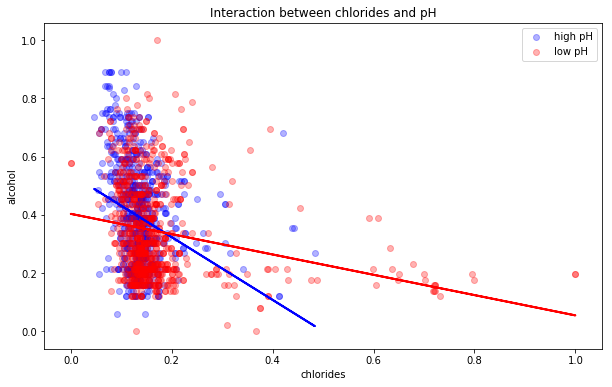

In [53]:
low_acid = X[X['pH']<.5]
high_acid = X[X['pH']>=.5]
check_interaction(high_acid, low_acid, 'chlorides', 'alcohol', 'pH')

Interaction

NameError: name 'residual' is not defined

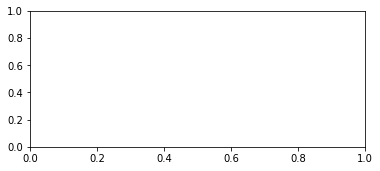

In [57]:
# checking for normality - QQ plot 
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
residual**2
0.9523990893322951